In [69]:
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

FILES_DIR = os.path.abspath('tmp')

In [70]:
def createHistogram(image, imageName, equalized = False):
    I = np.asarray(image)[:, :, 2]
    
    if equalized:
        imageName = imageName + '_equalized'

    plt.hist(I.flatten(), 256, [0, 256])
    plt.savefig(f'{FILES_DIR}/histograms/{imageName}_hsi.png')
    plt.show()

def convertHSI(image, imageName):
    hsvImg = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    H, S, V = cv2.split(hsvImg)

    hist, _ = np.histogram(V.flatten(), 256, [0,256]) 
    distance = hist.cumsum() / (V.shape[0] * V.shape[1]) 
    transformer =  np.clip(distance * 255, 0, 255).astype(np.uint8)

    V = cv2.LUT(V, transformer)

    equalizedImage = cv2.merge([H, S, V])
    equalizedImage = cv2.cvtColor(equalizedImage, cv2.COLOR_HSV2RGB)
    equalizedImage = cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB)

    hsvShowImg = Image.fromarray(hsvImg)
    equalizedImage = Image.fromarray(equalizedImage)
    
    print('Imagem HSI:')
    hsvShowImg.show()
    hsvShowImg.save(f'{FILES_DIR}/hsi/{imageName}_hsi.bmp')
    createHistogram(hsvShowImg, imageName)

    print('Imagem HSI Equalizada:')
    equalizedImage.show()
    equalizedImage.save(f'{FILES_DIR}/equalized/{imageName}_equalized.bmp')
    createHistogram(equalizedImage, imageName, True)

Imagem image1:


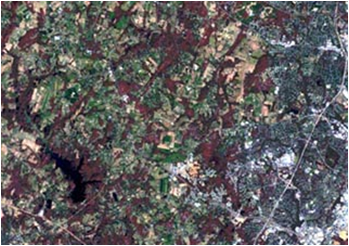

Imagem HSI:


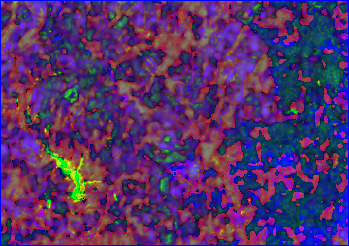

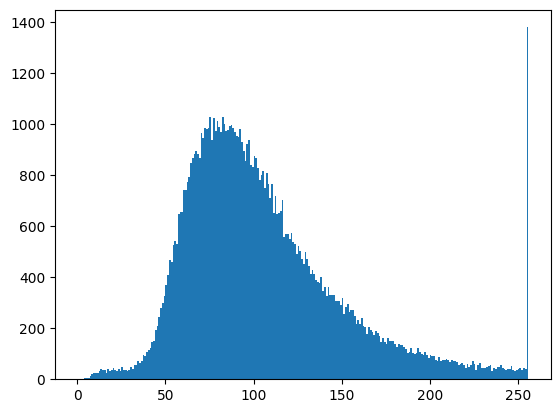

Imagem HSI Equalizada:


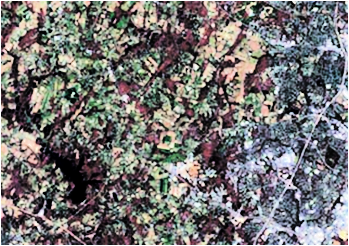

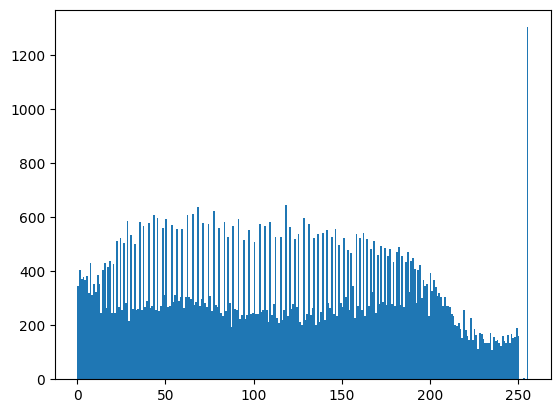

Imagem image2:


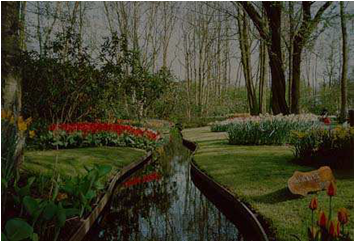

Imagem HSI:


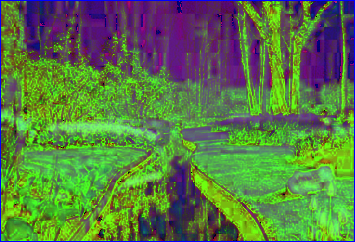

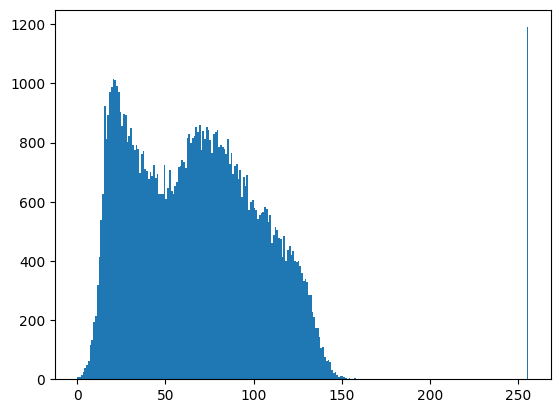

Imagem HSI Equalizada:


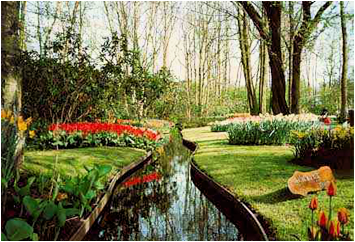

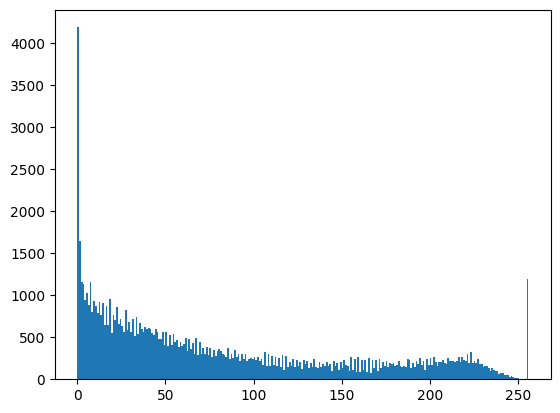

Imagem image3:


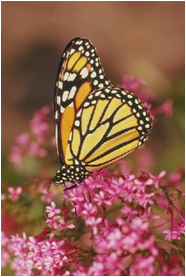

Imagem HSI:


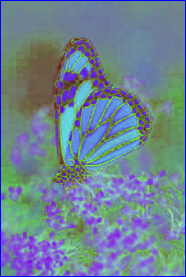

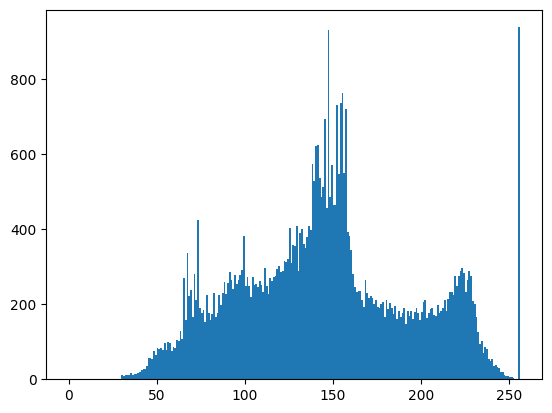

Imagem HSI Equalizada:


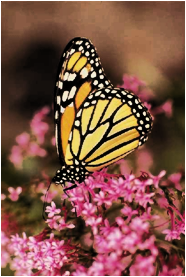

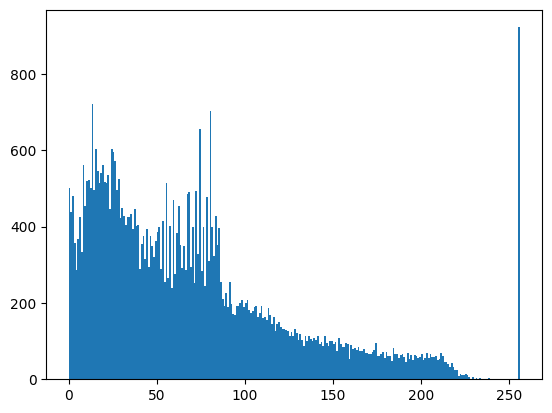

In [71]:
os.makedirs(f'{FILES_DIR}/hsi/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/histograms/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/equalized/', exist_ok = True)

images = [
    'image1',
    'image2',
    'image3'
]

for imageName in images:
    print(f'Imagem {imageName}:')

    image = Image.open(f'{FILES_DIR}/original/{imageName}_rgb.bmp').convert('RGB')
    image.show()

    image = cv2.imread(f'{FILES_DIR}/original/{imageName}_rgb.bmp')
    convertHSI(image, imageName)